In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import json
RESULTS_PATH = 'results.json'
ROUND_LIMIT = 3

In [2]:
def mean(data:list[float])->float:
    return sum(data)/len(data)
def mean_result_time(data:list[list[float]]):
    splitted = list(zip(*data))
    return (sum(splitted[0])/len(splitted[0]),sum(splitted[1])/len(splitted[1]))

In [3]:
with open(RESULTS_PATH,'r') as f:
    bench_data = json.load(f)

data_means = {}

for file in list(bench_data.keys()):
    data_means[file] = {}

    for variant in bench_data[file]:
        time_mean,score_mean = mean_result_time(bench_data[file][variant])
        data_means[file][variant] = [round(time_mean,ROUND_LIMIT),round(score_mean,ROUND_LIMIT)]
    


               time    length
seq           0.918  7544.370
parallel_1    0.957  7544.370
parallel_2    1.536  7561.171
parallel_4    0.791  8400.716
parallel_8    0.635  7786.621
parallel_16   0.322  7927.990
parallel_32   0.206  8263.058
parallel_64   0.301  9468.038
parallel_128  0.322  9262.754


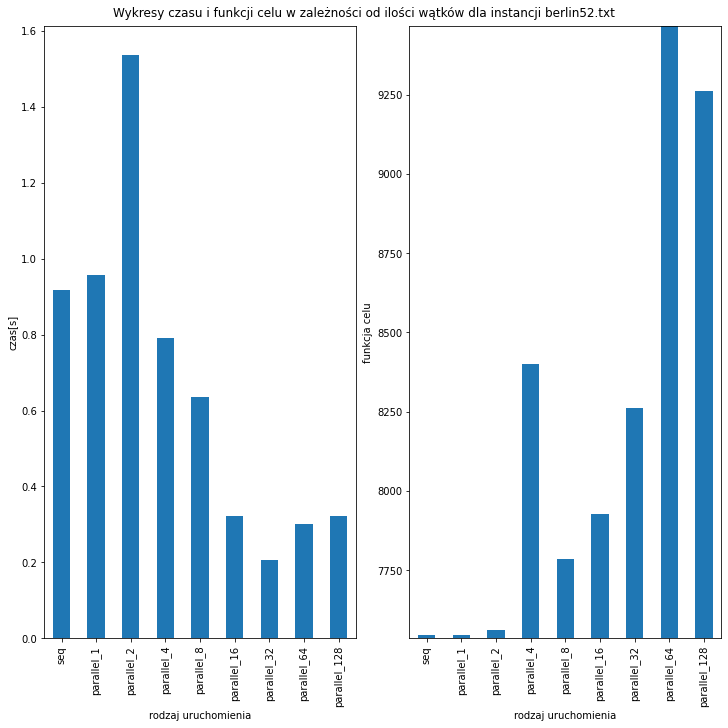

In [5]:

def plot_instance(instance:str = 'berlin52.txt'):
    df =pd.DataFrame([[value[0],value[1]] for _,value in data_means[instance].items()],columns=['time','length'],index=[x for x in data_means[instance]])
    fig,ax = plt.subplots(nrows = 1, ncols = 2,constrained_layout=True)
    plt.rcParams['figure.figsize'] = (10,10)
    print(df)
    fig.suptitle("Wykresy czasu i funkcji celu w zależności od ilości wątków dla instancji "+instance)
    df['time'].plot(kind='bar',ax=ax[0],ylabel = 'czas[s]',xlabel='rodzaj uruchomienia')
    df['length'].plot(kind='bar',ax=ax[1],ylabel = 'funkcja celu',xlabel='rodzaj uruchomienia',ylim=(min(df['length'])-10,max(df['length'])))

plot_instance('berlin52.txt')
